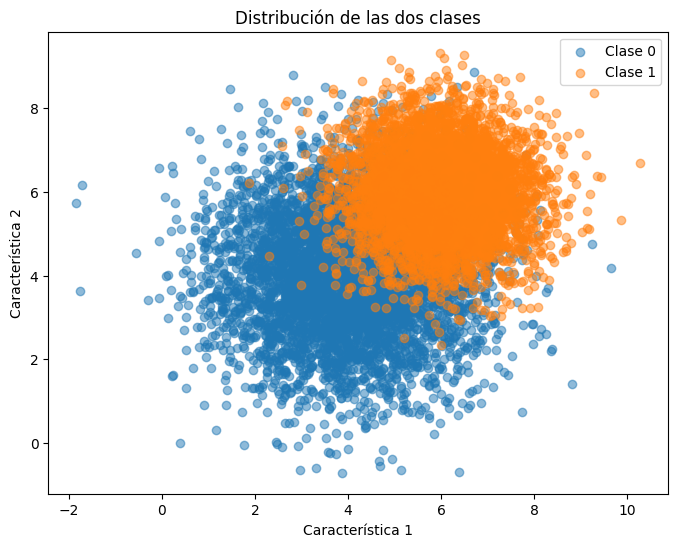

K=3, AUC=0.9086
K=5, AUC=0.9204
K=7, AUC=0.9300
K=9, AUC=0.9340


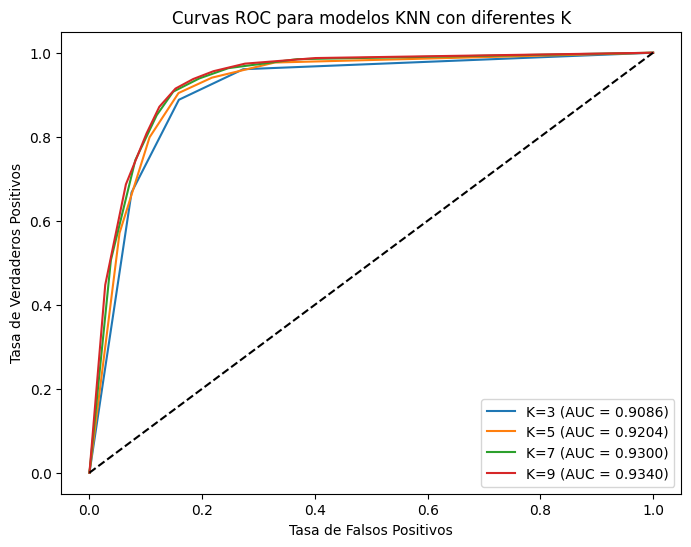

In [7]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Configuramos la semilla para reproducibilidad
np.random.seed(70)

# Generamos datos para dos clases
n_samples = 10000  # Total de muestras
n_features = 2     # Dos características para visualización fácil

# Generamos datos para la clase 0
n_samples_class0 = n_samples // 2
mean0 = [4, 4]
cov0 = [[2, 0], [0, 2]]  # Matriz de covarianza

X0 = np.random.multivariate_normal(mean0, cov0, n_samples_class0)

# Generamos datos para la clase 1
n_samples_class1 = n_samples - n_samples_class0
mean1 = [6, 6]
cov1 = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(mean1, cov1, n_samples_class1)

# Combinamos los datos y las etiquetas
X = np.vstack((X0, X1))
y = np.hstack((np.zeros(n_samples_class0), np.ones(n_samples_class1)))

# Mezclamos los datos
shuffle_indices = np.random.permutation(n_samples)
X = X[shuffle_indices]
y = y[shuffle_indices]

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Graficamos el scatter plot de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], alpha=0.5, label='Clase 0')
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, label='Clase 1')
plt.title('Distribución de las dos clases')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

# Definimos los valores de K a evaluar
k_values = [3, 5, 7, 9]
roc_results = {}

# Función para evaluar cada modelo KNN y calcular la curva ROC
def evaluate_knn(k):
    # Creamos y entrenamos el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    # Obtenemos las probabilidades para la clase positiva
    y_scores = knn.predict_proba(X_test)[:, 1]
    
    # Calculamos la curva ROC y el AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    return fpr, tpr, auc

# Evaluamos cada modelo y almacenamos los resultados
for k in k_values:
    fpr, tpr, auc = evaluate_knn(k)
    roc_results[k] = (fpr, tpr, auc)
    print(f"K={k}, AUC={auc:.4f}")

# Graficamos las curvas ROC
plt.figure(figsize=(8, 6))
for k in k_values:
    fpr, tpr, auc = roc_results[k]
    plt.plot(fpr, tpr, label=f'K={k} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal para referencia
plt.title('Curvas ROC para modelos KNN con diferentes K')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()
